In [1]:
from __future__ import print_function, division
%matplotlib inline
import brainweb
from brainweb import volshow
import numpy as np
from os import path
from tqdm.auto import tqdm
import logging
logging.basicConfig(level=logging.INFO)

In [29]:
# download
files = brainweb.get_files()

# read last file
data_54 = brainweb.load_file(files[-1])
data_53 = brainweb.load_file(files[-2])
# show last subject
print(files[-1])


BrainWeb Subjects:   0%|          | 0/20 [00:00<?, ?file/s]

/Users/h.shayea/.brainweb/subject_54.bin.gz


In [31]:
#Sizes and shapes
print(len(files))
print(data_54.shape)
print(data_53.shape)
print(files[-2])

20
(362, 434, 362)
(362, 434, 362)
/Users/h.shayea/.brainweb/subject_53.bin.gz


In [30]:
volshow(data_53, cmaps=['gist_ncar']);

Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=181, description='z', max=361), Output()), _dom_classes=('widget-interac…

## Transform

<div style="visibility: hidden">$\ifcsname bm\endcsname\else\newcommand{\bm}[1]{\mathbf{#1}}\fi$</div>
Convert raw image data:

- Siemens Biograph mMR resolution (~2mm) & dimensions (127, 344, 344)
- PET/T1/T2/uMap intensities
  + PET defaults to FDG intensity ratios; could use e.g. Amyloid instead
- randomised structure for PET/T1/T2
  + $\bm{\theta} \circ (\bm{1} + \gamma[2G_\sigma(\bm{\rho}) - \bm{1}])$
    * $\bm{\rho} = rand(127, 344, 344) \in [0, 1)$
    * Gaussian smoothing $\sigma = 1$
    * $\gamma = \left\{\matrix{1 & \text{for PET}\\ 0.75 & \text{for MR}}\right.$
    * $\bm{\theta}$ is the PET or MR piecewise constant phantom

In [11]:
# show region probability masks
PetClass = brainweb.FDG
label_probs = brainweb.get_label_probabilities(files[-1], labels=PetClass.all_labels)
#volshow(label_probs[brainweb.trim_zeros_ROI(label_probs)], titles=PetClass.all_labels, frameon=False);

BrainWeb labels:   0%|          | 0/12 [00:00<?, ?label/s]

In [14]:
#Sizes and shapes
#print(len(PetClass))
print(label_probs.shape)

(12, 127, 344, 344)


In [15]:
brainweb.seed(1337)

for f in tqdm(files, desc="mMR ground truths", unit="subject"):
    vol = brainweb.get_mmr_fromfile(
        f,
        petNoise=1, t1Noise=0.75, t2Noise=0.75,
        petSigma=1, t1Sigma=1, t2Sigma=1,
        PetClass=PetClass)

mMR ground truths:   0%|          | 0/20 [00:00<?, ?subject/s]

In [32]:
# show last subject
# print(f)
# volshow([vol['PET' ][:, 100:-100, 100:-100],
#          vol['uMap'][:, 100:-100, 100:-100],
#          vol['T1'  ][:, 100:-100, 100:-100],
#          vol['T2'  ][:, 100:-100, 100:-100]],
#         cmaps=['hot', 'bone', 'Greys_r', 'Greys_r'],
#         titles=["PET", "uMap", "T1", "T2"],
#         frameon=False);

In [19]:
files[-2]
subject_53

'/Users/h.shayea/.brainweb/subject_53.bin.gz'

In [35]:
subject_53 = brainweb.get_mmr_fromfile(
    files[-2],
    petNoise=1, t1Noise=0.75, t2Noise=0.75,
    petSigma=1, t1Sigma=1, t2Sigma=1,
    PetClass=PetClass)
T1_53   = subject_53['T1']
T2_53   = subject_53['T2']
PET_53  = subject_53['PET'] 
uMap_53 = subject_53['uMap'] 
#volshow(T1_53[:, 100:-100, 100:-100], cmaps=['Greys_r']);

In [24]:
uMap_53.shape

(127, 344, 344)

In [23]:
volshow([PET_53[:, 100:-100, 100:-100],
         uMap_53[:, 100:-100, 100:-100],
         T1_53[:, 100:-100, 100:-100],
         T2_53[:, 100:-100, 100:-100]],
        cmaps=['hot', 'bone', 'Greys_r', 'Greys_r'],
        titles=["PET", "uMap", "T1", "T2"],
        frameon=False);

Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=63, description='z', max=126), Output()), _dom_classes=('widget-interact…

In [86]:
# label probibilities
background_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][0, 45, :]
csf_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][1, 45, :]
gray_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][2, 45, :]
white_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][3, 45, :]
fat_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][4, 45, :]
muscle_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][5, 45, :]
skin_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][6, 45, :]
skull_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][7, 45, :]
vessels_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][8, 45, :]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
lb = label_probs[brainweb.trim_zeros_ROI(label_probs)]



Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

(9, 89, 104, 87)

In [82]:
print(lb.shape)
print(label_probs.shape)

(9, 89, 104, 87)
(12, 127, 344, 344)


In [79]:
lb1= lb[1]
lb2 = label_probs[1]
lb2.shape

(127, 344, 344)

In [123]:
volshow(lb[1], titles='csf_label', frameon=False);#, cmaps=['gist_ncar']

Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=44, description='z', max=88), Output()), _dom_classes=('widget-interact'…

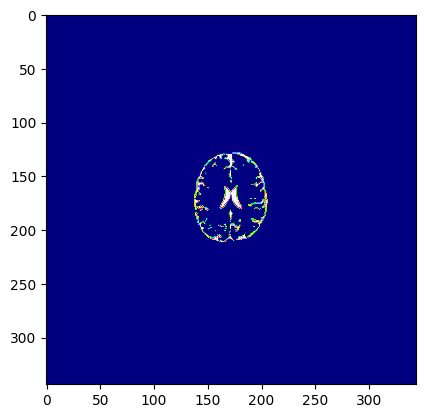

In [119]:
from matplotlib import pyplot as plt
plt.imshow(lb2[66], cmap='gist_ncar');

In [83]:
def plot_images(*images):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, len(images))
    
    # Iterate through images and plot on a subplot
    for i, img in enumerate(images):
        axs[i].imshow(img, cmap='gray')
        for name, var in globals().items():
            if var is img:
                axs[i].set_title(name)
    
    # Show the plot
    plt.show()

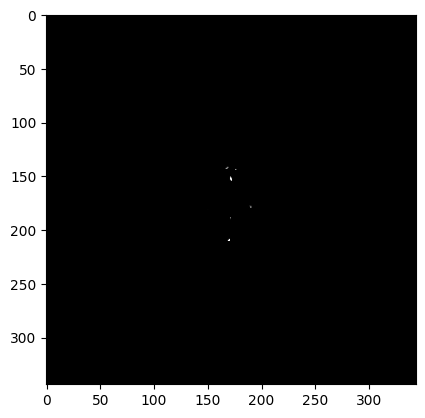

In [118]:
lb2 = label_probs[1]
lb3 =label_probs[2]
lb4 =label_probs[3]
lb5 =label_probs[4]
lb6 =label_probs[5]
lb7 =label_probs[6]
lb8 =label_probs[7]
lb9 =label_probs[8]
labels2 = lb2[66], lb3[66], lb4[66], lb5[66], lb6[66], lb7[66], lb8[66], lb9[66]
plt.imshow(lb9[66], cmap='gray');

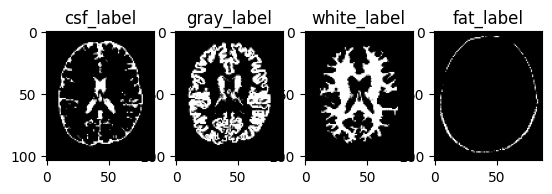

In [102]:
labels = background_label, csf_label, gray_label, white_label, fat_label, muscle_label,skin_label, skull_label, vessels_label
#labels2 = 
plot_images(csf_label, gray_label, white_label, fat_label)

In [104]:
def create_image(T_map, TE, labels):
    

    # dictionary with pixel values for each tissue type
    pixel_values = {
        "background": 0,
        "csf": {"T1": brainweb.T1.csf, "T2": 250, "PD": 200},
        "gray_matter": {"T1": brainweb.T1.greyMatter, "T2": 100, "PD": 40},
        "white_matter": {"T1": brainweb.T1.whiteMatter, "T2": 70, "PD": 90},
        "fat": {"T1": brainweb.T1.fat, "T2": 85, "PD": -20},
        "muscle": {"T1": brainweb.T1.muscle, "T2": 47, "PD": 25},
        "skin": {"T1": brainweb.T1.skin, "T2": 70, "PD": 75},
        "skull": {"T1": brainweb.T1.skull, "T2": 100, "PD": 30},
        "vessels": {"T1": brainweb.T1.vessels, "T2": 50, "PD": 45}
    }

    # get the labels for each tissue type
    background_label = labels[0]
    csf_label = labels[1]
    gray_label = labels[2]
    white_label = labels[3]
    fat_label = labels[4]
    muscle_label = labels[5]
    skin_label = labels[6]
    skull_label = labels[7]
    vessels_label = labels[8]
    image = np.zeros_like(csf_label)
    # loop over all pixels and set the pixel value based on the tissue type
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if background_label[i,j] == 1:
                image[i,j] = pixel_values["background"]
            elif csf_label[i,j] == 1:
                image[i,j] = pixel_values["csf"]["PD"] * np.exp(-TE/pixel_values["csf"][T_map])
            elif gray_label[i,j] == 1:
                image[i,j] = pixel_values["gray_matter"]["PD"] * np.exp(-TE/pixel_values["gray_matter"][T_map])
            elif white_label[i,j] == 1:
                image[i,j] = pixel_values["white_matter"]["PD"] * np.exp(-TE/pixel_values["white_matter"][T_map])
            elif fat_label[i,j] == 1:
                image[i,j] = pixel_values["fat"]["PD"] * np.exp(-TE/pixel_values["fat"][T_map])
            elif muscle_label[i,j] == 1:
                image[i,j] = pixel_values["muscle"]["PD"] * np.exp(-TE/pixel_values["muscle"][T_map])
            elif skin_label[i,j] == 1:
                image[i,j] = pixel_values["skin"]["PD"] * np.exp(-TE/pixel_values["muscle"][T_map])
                from scipy.ndimage.filters import gaussian_filter
   
    return gaussian_filter(image, sigma=0.6) + np.random.normal(0, 1.0, image.shape)

/var/folders/mz/wkmsv24x0q3fq1fzg37nll200000gn/T/ipykernel_53203/3278324900.py:45: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


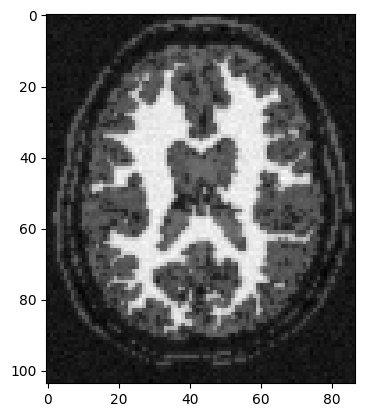

In [105]:
TE = 120
T_map = 'T1'
T1_image = create_image(T_map, TE,labels)
plt.imshow(T1_image, cmap='gray')

/var/folders/mz/wkmsv24x0q3fq1fzg37nll200000gn/T/ipykernel_53203/3278324900.py:45: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


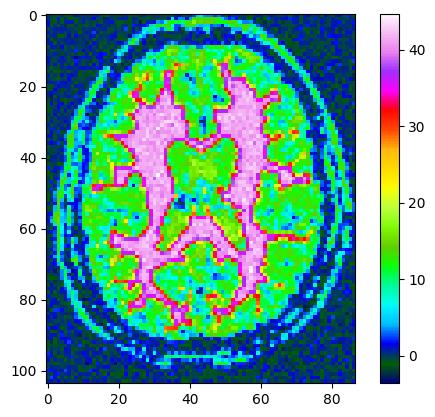

In [126]:
TE = 120
T_map = 'T1'
T1_image = create_image(T_map, TE,labels)
plt.imshow(T1_image, cmap='gist_ncar')
plt.colorbar()
plt.show()

/var/folders/mz/wkmsv24x0q3fq1fzg37nll200000gn/T/ipykernel_53203/3278324900.py:45: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


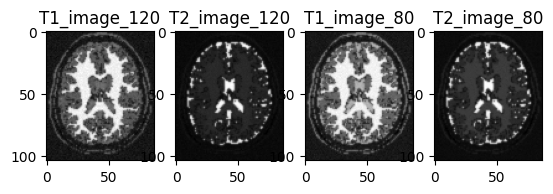

In [106]:
T1_image_120 = create_image('T1', 120,labels)
T2_image_120 = create_image('T2', 120,labels)
T1_image_80 = create_image('T1', 80,labels)
T2_image_80 = create_image('T2', 80,labels)
plot_images(T1_image_120, T2_image_120, T1_image_80,T2_image_80)

/var/folders/mz/wkmsv24x0q3fq1fzg37nll200000gn/T/ipykernel_53203/4091589966.py:17: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


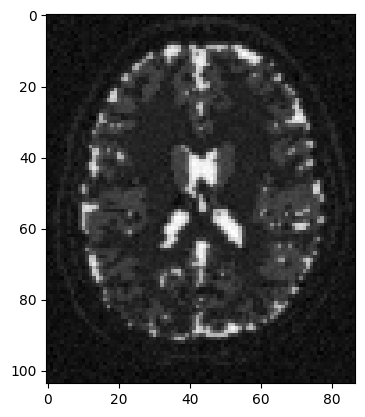

In [101]:
image = np.zeros_like(vessels_label)
gray_value = brainweb.T2.greyMatter
white_value = brainweb.T2.whiteMatter
csf_value = brainweb.T2.csf
fat_value = brainweb.T2.fat
muscle_value = brainweb.T2.muscle
skin_value = brainweb.T2.skin
skull_value = brainweb.T2.skull
vessels_value = brainweb.T2.vessels

image[csf_label == 1.0] = 100 * np.exp(- (200/csf_value))
image[gray_label == 1.0] = 70 * np.exp(- (200/gray_value))
image[white_label == 1.0] = 60 * np.exp(- (200/white_value))
image[skin_label == 1.0] = 95 * np.exp(- (200/skin_value))
image[skull_label == 1.0] = 10 * np.exp(- (200/skull_value))
image[vessels_label == 1.0] = 85 * np.exp(- (200/vessels_value))
from scipy.ndimage.filters import gaussian_filter
image = gaussian_filter(image, sigma=0.6) + np.random.normal(0, 1.0, image.shape)

plt.imshow(image, cmap='gray')
